In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

In [27]:
# load the data
data = pd.read_csv('creditcard.csv')

In [28]:
# check the shape of the data
print(data.shape)




(284807, 31)


In [29]:
# check the first few rows of the data
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [30]:
# check the statistical summary of the data
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [31]:
# check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [32]:
# check for duplicate values
print(data.duplicated().sum())

1081


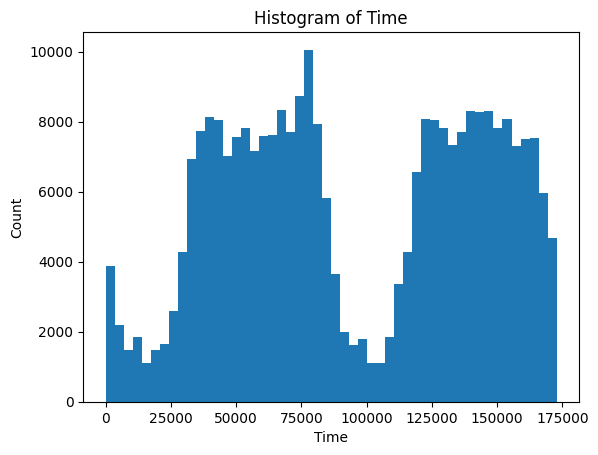

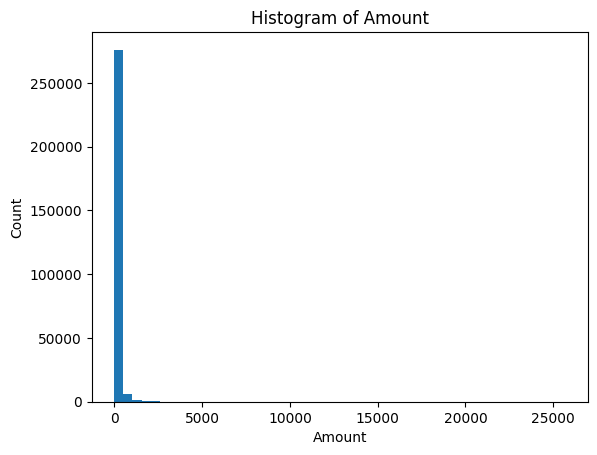

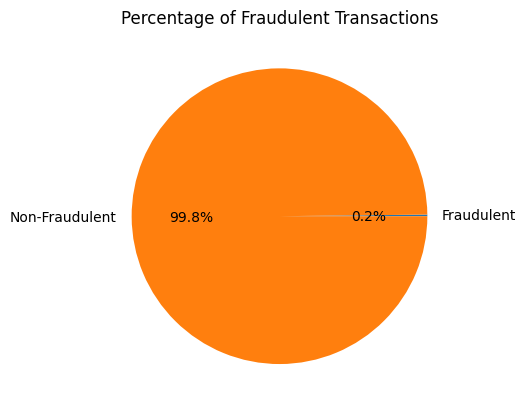

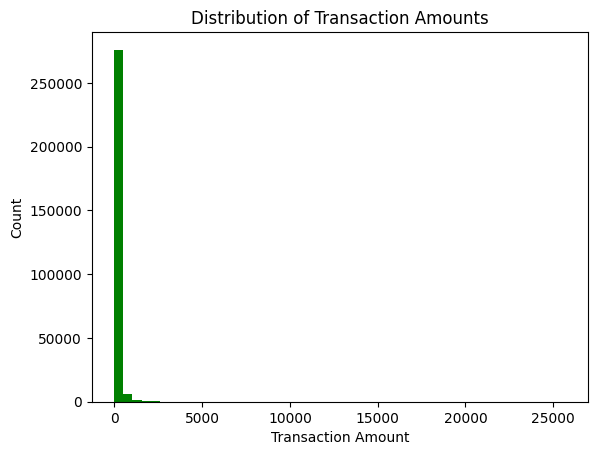

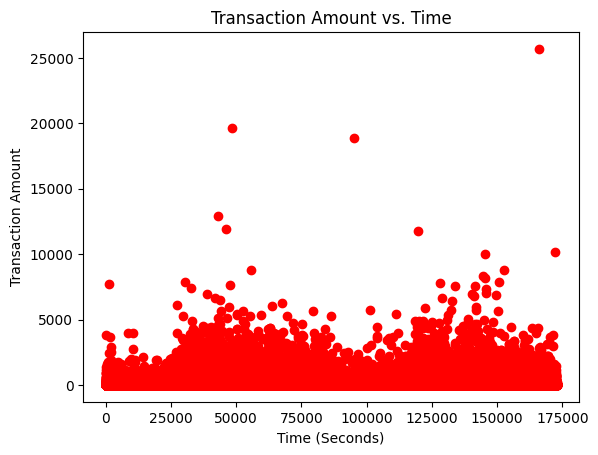

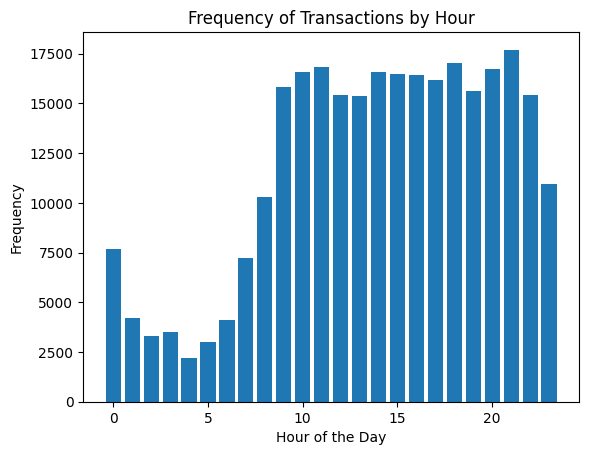

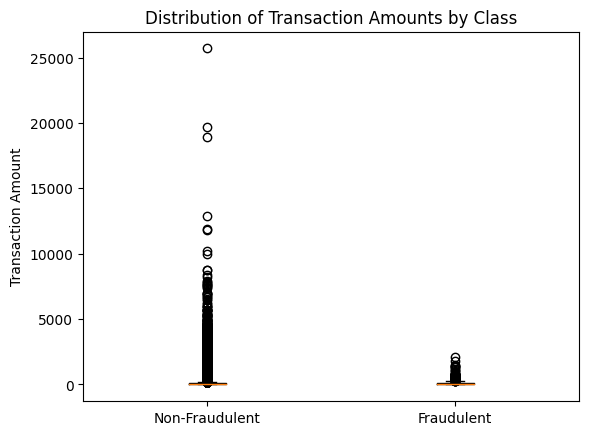

In [33]:
# create a histogram of the Time column
plt.hist(data['Time'], bins=50)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Histogram of Time')
plt.show()

# create a histogram of the Amount column
plt.hist(data['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Histogram of Amount')
plt.show()

# calculate the percentage of fraudulent transactions
fraud_pct = data['Class'].value_counts(normalize=True)[1] * 100

# create a pie chart to show the percentage of fraudulent transactions
plt.pie([fraud_pct, 100-fraud_pct], labels=['Fraudulent', 'Non-Fraudulent'], autopct='%1.1f%%')
plt.title('Percentage of Fraudulent Transactions')
plt.show()

# create a histogram to show the distribution of transaction amounts
plt.hist(data['Amount'], bins=50, color='g')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

# create a scatter plot to show the relationship between transaction amount and time
plt.scatter(data['Time'], data['Amount'], color='r')
plt.xlabel('Time (Seconds)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Time')
plt.show()

# create a bar chart to show the frequency of transactions by hour
data['Hour'] = data['Time'].apply(lambda x: int(x/3600) % 24)
plt.bar(data['Hour'].value_counts().index, data['Hour'].value_counts().values)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency of Transactions by Hour')
plt.show()

# create a box plot to show the distribution of transaction amounts by class
plt.boxplot([data[data['Class'] == 0]['Amount'], data[data['Class'] == 1]['Amount']])
plt.xticks([1, 2], ['Non-Fraudulent', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Class')
plt.show()

In [34]:
# Scaling Amount and Time


# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [35]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [36]:
data

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,23
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,23
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,23
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,23


## Random Undersampling


In [37]:

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
103563,-0.018585,-0.187725,-0.607999,1.263761,1.165809,0.018893,-0.032004,-0.967972,0.776297,-0.088522,...,-0.292582,-0.688672,0.021970,0.332551,-0.091576,0.076797,0.360126,0.159014,0,19
11880,-0.293440,-0.754720,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1,5
203631,-0.126179,0.589810,2.032375,-0.042420,-1.063788,0.411050,-0.059004,-1.107889,0.233925,-0.353074,...,-0.268313,-0.622234,0.328424,0.007120,-0.293123,0.197451,-0.064951,-0.057000,0,13
183106,-0.307413,0.481279,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,...,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,1,10
222133,1.715923,0.683138,-3.613850,-0.922136,-4.749887,3.373001,-0.545207,-1.171301,-4.172315,1.517016,...,0.786787,0.893065,1.034907,0.097671,-1.345551,-0.788329,1.055442,0.099971,1,15


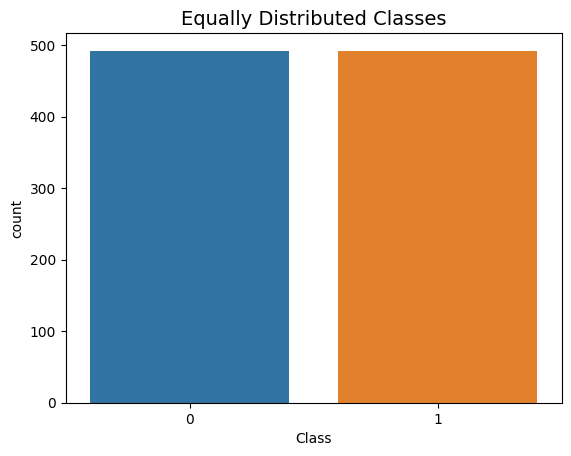

In [38]:
sns.countplot(data=new_df, x="Class")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Text(0.5, 1.0, 'V12')

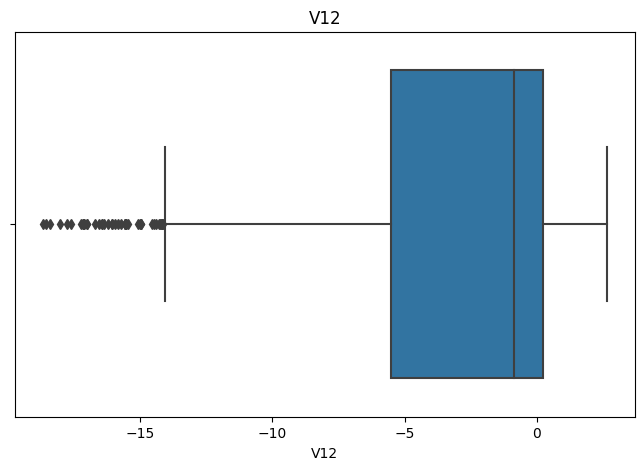

In [39]:
# Boxplot 
plt.figure(figsize=(8, 5))
sns.boxplot(x=new_df.V12)
plt.title("V12")

Text(0.5, 1.0, 'V14')

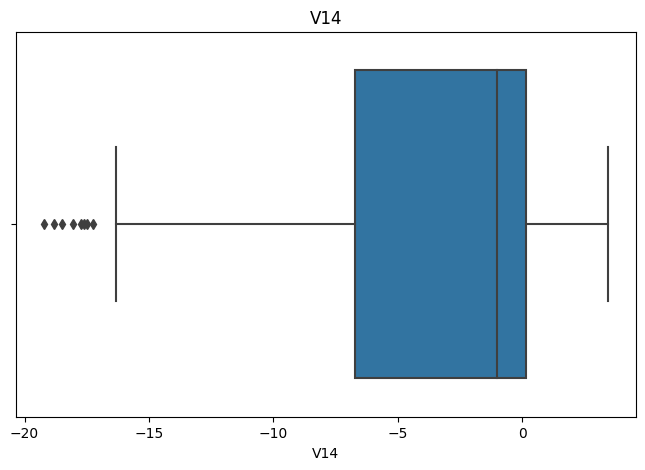

In [40]:
# Boxplot 
plt.figure(figsize=(8, 5))
sns.boxplot(x=new_df.V14)
plt.title("V14")

Text(0.5, 1.0, 'V10')

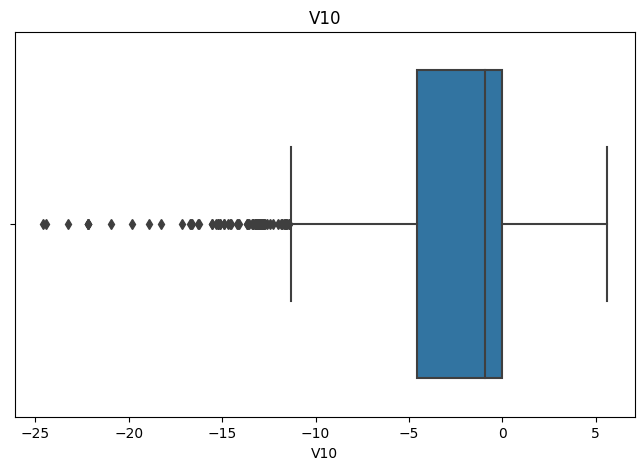

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=new_df.V10)
plt.title("V10")

In [42]:
# # -----> V14 Removing Outliers
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)






Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]


In [43]:
# -----> V12 removing outliers 
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)



V12 outliers: [-18.6837146333443, -18.0475965708216, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4


In [44]:
# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

V10 outliers: [-20.9491915543611, -24.4031849699728, -14.9246547735487, -18.2711681738888, -16.2556117491401, -15.2318333653018, -22.1870885620007, -22.1870885620007, -15.5637913387301, -16.6496281595399, -24.5882624372475, -22.1870885620007, -15.1237521803455, -14.9246547735487, -17.1415136412892, -15.1241628144947, -16.6011969664137, -15.5637913387301, -15.2399619587112, -19.836148851696, -22.1870885620007, -16.7460441053944, -23.2282548357516, -18.9132433348732, -15.3460988468775, -15.2399619587112, -16.3035376590131]
Feature V10 Outliers for Fraud Cases: 27


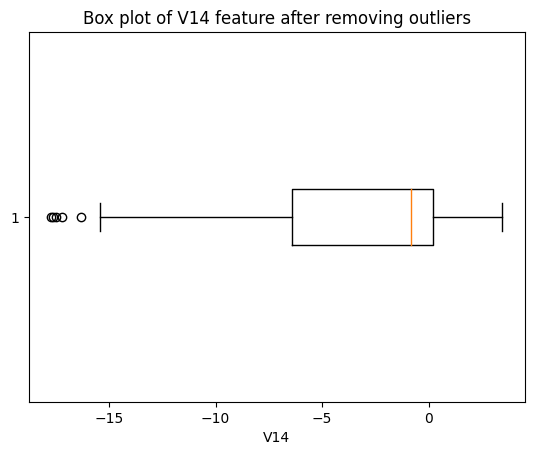

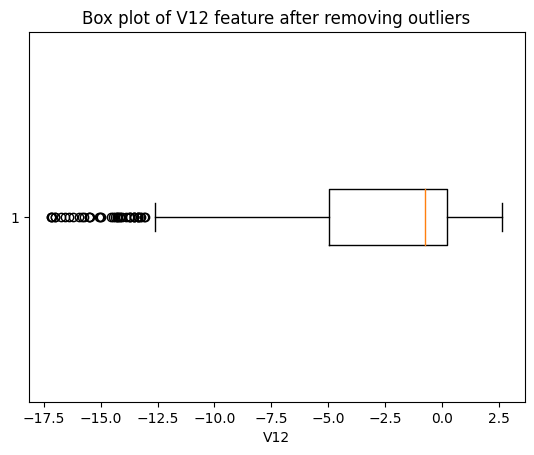

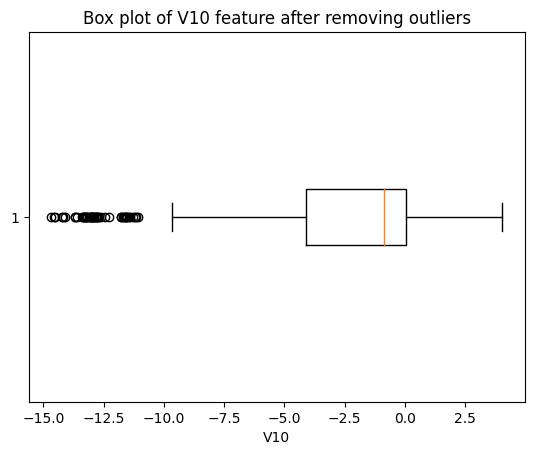

In [45]:
# boxplot for V14
plt.boxplot(new_df['V14'], vert=False)
plt.xlabel('V14')
plt.title('Box plot of V14 feature after removing outliers')
plt.show()

# boxplot for V12

plt.boxplot(new_df['V12'], vert=False)
plt.xlabel('V12')
plt.title('Box plot of V12 feature after removing outliers')
plt.show()

# boxplot for v10

plt.boxplot(new_df['V10'], vert=False)
plt.xlabel('V10')
plt.title('Box plot of V10 feature after removing outliers')
plt.show()


## Dimesionality Reduction and Clustering

In [42]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

/home/shashwat/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shashwat/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


T-SNE took 6.5 s


In [46]:
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.063 s


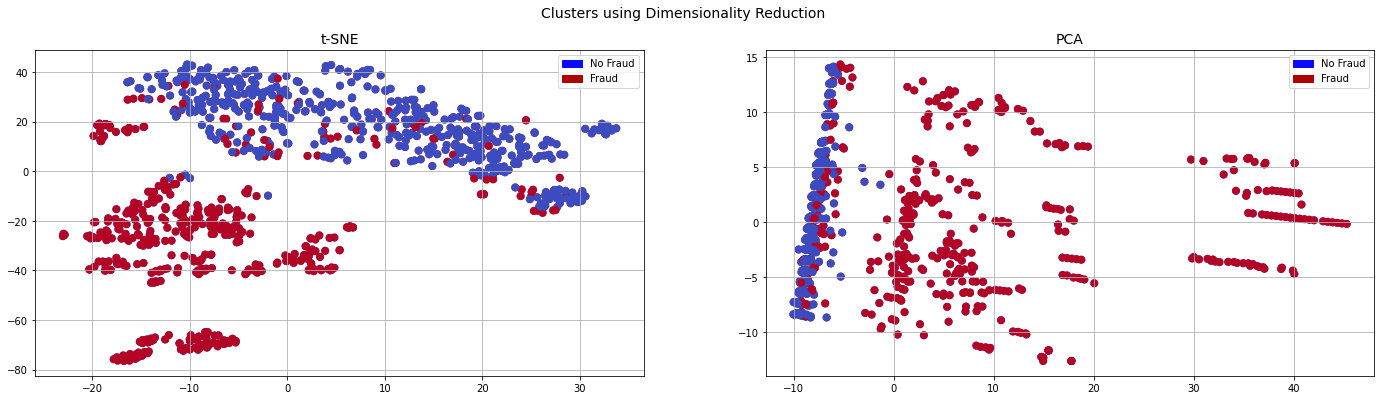

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

#### The t-sne plot shows that it is successful in differentiating between Class variable and make clusters accordingly. Thus, models should be able to predict the test dataset accurately.

In [52]:
# Define X and Y
X = data.drop('Class', axis=1)
y = data['Class']

In [53]:
# This will be the original training and test dataset for predicting the final model
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Turn into an array (If Revan will use Classifiers from the notebook shared on Teams)
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [55]:
# split the undersampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Class', axis=1), new_df['Class'], test_size=0.2, random_state=42)

In [56]:
# Turn into an array (If Revan will use Classifiers from the notebook shared on Teams)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

##### Next task to feed undersample data into classifiers and get scores. Then, create and feed oversample data to classifier and check scores. Also, checking prediction scores for original dataset for both instances.

In [31]:
data = pd.read_csv('creditcard.csv')
percentage_of_Class_0 = ((data[data['Class']==0].count())/data['Class'].count())*100
percentage_of_Class_1 = ((data[data['Class']==1].count())/data['Class'].count())*100
print(percentage_of_Class_0['Class'],'%')
print(percentage_of_Class_1['Class'],'%')

99.82725143693798 %
0.1727485630620034 %


Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count(Class)'}>

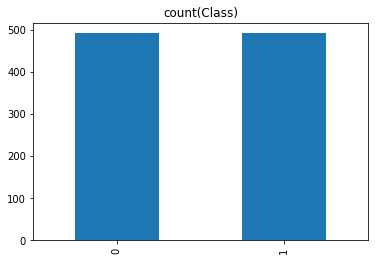

In [32]:
# Random UnderSampling

# Class count
count_class_0, count_class_1 = data.Class.value_counts()

# Divide by class
df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())
df_test_under.Class.value_counts().plot(kind='bar',title = 'count(Class)')

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

y = df_test_under['Class']
x = df_test_under.drop('Class', axis = 1)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(x,y, test_size = 0.20, random_state = 22)

model = XGBClassifier()
model.fit(X_train_under,y_train_under)
y_under_pred = model.predict(X_test_under)

print("\n========= Under Sampled Data Accuracy using XGBClassifier==============\n")
print("Accuracy Score ", accuracy_score(y_under_pred,y_test_under)) 
print ("\n =====Confusion Matrix ======\n")
confusion_matrix(y_under_pred,y_test_under)


========= Under Sampled Data Accuracy using XGBClassifier==============

Accuracy Score  0.9644670050761421

 =====Confusion Matrix ======



array([[92,  6],
       [ 1, 98]], dtype=int64)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_under,y_train_under)
ylr_under_pred = lr.predict(X_test_under)

acuuracy_score = accuracy_score(y_under_pred,y_test_under)

print("\n========= Under Sampled Data Accuracyv using Logistic Regression ==============\n")

print("Accuracy Score ",acuuracy_score) 
print ("\n =====Confusion Matrix ======\n")
cm = confusion_matrix(ylr_under_pred,y_test_under)
cm


========= Under Sampled Data Accuracyv using Logistic Regression ==============

Accuracy Score  0.9644670050761421

 =====Confusion Matrix ======



array([[90, 10],
       [ 3, 94]], dtype=int64)

Random over-sampling:
0    284315
1    284315
Name: Class, dtype: int64


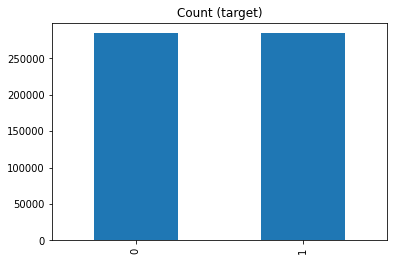

In [35]:
#Random OverSampling

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

df_test_over.Class.value_counts().plot(kind='bar', title='Count (target)');

In [36]:
y_over = df_test_over['Class']
X_over = df_test_over.drop('Class', axis = 1)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over, test_size = 0.20, random_state = 42)
model.fit(X_train_over,y_train_over)
y_over_pred = model.predict(X_test_over)

print("\n========= Over Sampled Data Accuracyv using using XGBClassifier ==============\n")

print("Accuracy Score ",accuracy_score(y_over_pred,y_test_over))
print ("\n =====Confusion Matrix ======\n")
confusion_matrix(y_over_pred, y_test_over)


========= Over Sampled Data Accuracyv using using XGBClassifier ==============

Accuracy Score  0.9999296554877513

 =====Confusion Matrix ======



array([[56738,     0],
       [    8, 56980]], dtype=int64)

In [37]:
lr.fit(X_train_over,y_train_over)
ylr_over_pred = lr.predict(X_test_over)

print("\n========= Over Sampled Data Accuracyv using Logistic Regression ==============\n")

print("Accuracy Score ",accuracy_score(ylr_over_pred,y_test_over))
print ("\n =====Confusion Matrix ======\n")
confusion_matrix(ylr_over_pred, y_test_over)


========= Over Sampled Data Accuracyv using Logistic Regression ==============

Accuracy Score  0.9404885426375675

 =====Confusion Matrix ======



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[54434,  4456],
       [ 2312, 52524]], dtype=int64)

In [38]:
#Without under and oversampling

y = data['Class']
x = data.drop('Class', axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


In [43]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

print("\n========= Without Over and Under Sampling Data Accuracyv using XGBClassifier ==============\n")

y_pred = model.predict(X_test)
print("Accuracy Score ",accuracy_score(y_pred,y_test))
print ("\n =====Confusion Matrix ======\n")
print(confusion_matrix(y_pred,y_test))


========= Without Over and Under Sampling Data Accuracyv using XGBClassifier ==============

Accuracy Score  0.9996605924417448

 =====Confusion Matrix ======

[[85301    23]
 [    6   113]]


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

print("\n========= Without Over and Under Sampling Data Accuracyv using Logistic Regression ==============\n")

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

lr.score(X_test,y_test)

print("Accuracy Score ",accuracy_score(y_pred,y_test))
print ("\n =====Confusion Matrix ======\n")
print(confusion_matrix(y_pred,y_test))


========= Without Over and Under Sampling Data Accuracyv using Logistic Regression ==============

Accuracy Score  0.9992743700478681

 =====Confusion Matrix ======

[[85295    50]
 [   12    86]]
